
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statement

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


In [62]:
# Import necessary packages
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast 
import itertools
from collections import Counter
from  itertools import chain
import csv
import re

In [41]:
# Read the CSV file
df = pd.read_csv('resume updated.csv')

In [42]:
df.shape

(2492, 164)

In [43]:
# Print first 5 rows
df.head(5)

,ID,Resume_str,Category,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33176873,HR DIRECTOR Summary Over 2...,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27018550,HR SPECIALIST Summary Dedica...,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17812897,HR MANAGER Skill Highlights ...,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.drop(df.iloc[:, 3:],axis = 1,inplace=True)

In [45]:
# Look at the data type of each column and whether null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2492 non-null   object
 1   Resume_str  2492 non-null   object
 2   Category    2465 non-null   object
dtypes: object(3)
memory usage: 58.5+ KB


In [46]:
df.isnull().sum()

ID             0
Resume_str     0
Category      27
dtype: int64

In [47]:
df.dropna(subset=['Category'], inplace=True)

In [48]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
ID,0,0.0
Resume_str,0,0.0
Category,0,0.0


In [49]:
df.groupby('Category').size().reset_index(name='Count')

,Category,Count
0,Business Development,1
1,Oracle database,1
2,ethical and independent decision-making abili...,1
3,food and tableware,1
4,married to Cassie Short my wife of the 3years...,1
5,open and committed to building customer base ...,1
6,worked closely with end customer and subcontr...,1
7,ACCOUNTANT,116
8,ADVOCATE,115
9,AGRICULTURE,63


In [50]:
df['Category'] = df['Category'].str.strip().replace('Business Development', 'BUSINESS-DEVELOPMENT')

In [51]:
category_counts = df['Category'].value_counts()
df = df.loc[df['Category'].isin(category_counts[category_counts > 1].index)]

In [52]:
 df.groupby('Category').size().reset_index(name='Count')

,Category,Count
0,ACCOUNTANT,116
1,ADVOCATE,115
2,AGRICULTURE,63
3,APPAREL,96
4,ARTS,103
5,AUTOMOBILE,35
6,AVIATION,117
7,BANKING,115
8,BPO,21
9,BUSINESS-DEVELOPMENT,120


In [53]:
# clean Resume_str
def clean_resume(resume):
    # Remove \u200b and \xa0
    resume = resume.replace('\u200b', '').replace('\xa0', '')

    # Remove \n and whitespace
    resume = resume.replace('\n', '').strip()

    # Tokenize the resume string into words
    words = word_tokenize(resume)

    # Join the words back into a string
    cleaned_resume = ' '.join(words)

    return cleaned_resume

df['Resume_str'] = df['Resume_str'].apply(clean_resume)


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

In [22]:
# Find num of languages for each applicant 
def get_languages(string):
    languages_list = [ "Spanish", "Arabic" ,"Portuguese", "English","Italian","FRENCH","Turkish","Chinese","Greek","Romanian","Hindi","Sign Language" ,"Russian","Pashto","Oriya","German", "Telugu" , "Luganda","creole","Bengali","Kannada","Malayalam","Urdu","Tamil","Dari","Dutch","Daro","Japanese","ordo", "Croatian", "Cyrillic" ,"Swahili","Swedish","Vietnamese","Kurdish","Farsi","Shona","Punjabi","Gujarati","Bulgarian","Armenian","Marathi","Bahasa Malaysia","Belarusian"]
    pattern = re.compile('|'.join(languages_list), re.IGNORECASE)
    matches = pattern.findall(string)
    a=list(map(lambda x: x.lower(), matches))
    return 1 if len(np.unique(np.array(a)))==0 else len(np.unique(np.array(a)))

#Find skill that applicant had and return a list of skill
def get_skills(text):
    s=[]
    pattern = r'Skills(?:\s+[\w\s\(\)\+#\.\/-]+,)+(?:\s?\w+)*'
    matches = re.findall(pattern, text)
    if matches:
        s = [skill.strip() for skill in matches[0].split(',')]
        s[0]=s[0][10:]
    return s
    

# Extract the qualifications that each applicant had for the job
def get_qualifications(text):
    
    summary_match = re.search(r"Summary\s+(.+?)\.", text)
    if summary_match:
            return summary_match.group(1)
        
        
    summary_match = re.search(r"Qualifications\s+(.+?)\.",text)
    if summary_match:
            return summary_match.group(1)
        
    summary_match = re.search(r"Highlights\s+(.+?)\.",text)
    if summary_match:
            return summary_match.group(1)
    
    return None

# Find if the applicant had (DRIVERS_LICENSE_AVAILABILITY, VOLUNTEERING, COMMUNITY SERVICE, AWORDS)
def find_list_in_string(words,string):
    pattern = re.compile('|'.join(words), re.IGNORECASE)
    match = pattern.findall(string)
    return "yes"  if match else  "no"

# Extract type of school the applicant study in (university, college, high school)
def extract_school_type(text):
    patterns = [r"university", r"college", r"high school"]
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return match.group().lower()
    return None

# type of education that the applicant had (master, bachelor, diploma….)
def extract_education_type(text):
    patterns = [
        (r"Doctorate|Ph\.D|PhD", "Doctorate"),
        (r"Master", "Master"),
        (r"Bachelor|BA|BS|BSBM|BSBA", "Bachelor"),
        (r"Diploma|GED", "Diploma")
    ]
    for pattern, education_type in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return education_type
    return None

# Extract the education major you study in this school
def extract_education_major(text):
    
    patterns1 = [
        r"Doctorate\s+of\s+([A-z]+\s?)+",
        r"Master('s)?\s+of\s+([A-z]+\s?)+",
        r"bachelor('s)?\s+of\s+([A-z]+\s?)+",
        r"Associate\s+of\s+([A-z]+\s?)+"
    ]
    
    patterns2 = [
        r"Doctorate\s+:\s+([A-z]+\s?)+",
        r"(PhD|Ph\.D|Ph\.D\.)\s+:\s+([A-z]+\s?)+",
        r"Master('s)?\s+:\s+([A-z]+\s?)+",
        r"bachelor('s)?\s+:\s+([A-z]+\s?)+",
        r"(\(?(BS|B\.S|B\.S\.|BA|B\.A|B\.A\.|B\.B\.A|BAS|MBA)\)?)\s+:\s+([A-z]+\s?)+",
        r"Degree\s+:\s+([A-z]+\s?)+"
    ]
    
    for pattern in patterns1:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return re.split(r"of\s+", match.group(), re.IGNORECASE)[-1].strip().lower()

    for pattern in patterns2:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            education_major = match.group().lower()
            major = re.split(r":\s+", education_major, re.IGNORECASE)[-1]
            return major.strip()
    

    
    return None


In [23]:
def calculate_experience_duration(start_date, end_date):
    start_year = int(start_date[-4:])
    if end_date.lower() == 'current':
        end_year = datetime.now().year
    else:
        end_year = int(end_date[-4:])
    return end_year - start_year

def extract_experience_length(text):
    pattern1 = r'[0-9]+\s?\+?\s?years\s?(of)?'
    pattern2 = r'\d{2}[/\s]\d{4}\s+to\s+\d{2}[/\s]\d{4}'
    pattern3 = r'[a-zA-Z]{3}/\d{4}\s+to\s+[a-zA-Z]{3}/\d{4}'
  

    match = re.search(pattern1, text)
    if match:
        years_match = re.search(r'\d+', match.group())
        if years_match:
            years = int(years_match.group())
            return int(years)
    
    match = re.search(pattern2, text)
    if match:
        dates = re.findall(pattern2, text)
        total_experience = 0
        for date_range in dates:
            start_date, end_date = map(lambda x: datetime.strptime(x.strip(), '%m/%Y'), date_range.split('to'))
            experience_length = (end_date - start_date).days // 365
            total_experience += experience_length

        return int(total_experience)
    
    match = re.search(pattern3, text)
    if match:
        dates = re.findall(pattern3, text)
        total_experience = 0
        for date_range in dates:
            start_date, end_date = map(lambda x: datetime.strptime(x.strip(), '%b/%Y'), date_range.split('to'))
            experience_length = (end_date - start_date).days // 365
            total_experience += experience_length

        return int(total_experience)
    
    match = re.search(r"(\w+\s\d{4})\s*to\s*(\w+\s\d{4}|Current)", text)
    if match:
        matches = re.findall(r"(\w+\s\d{4})\s*to\s*(\w+\s\d{4}|Current)", text)
        experiences = []
        for match in matches:
            duration = calculate_experience_duration(match[0], match[1])
            experiences.append((match[0], match[1], duration))

        return sum(experience[2] for experience in experiences)


    
    return None



In [24]:

# Read the CSV file
data = pd.read_csv('resume updated.csv')

# Define function to extract information
def extract_info(resume_text):
    # Initialize variables
    position_title = ""
    qualifications = ""
    education_type = ""
    school_type = ""
    education_major = ""
    experience_length = ""
    awards = ""
    community_service = ""
    volunteering = ""
    drivers_license = ""
    skills_count = ""
    skills = ""
    languages = ""
    
    drivers_license_list=["Driver's License","CDL","drivers license"]
    community_service_list=["Community Service","Community Involvement","Community Engagement"]
    volunteering_list=["Volunteer","non-profit organizations","Public Service"]
    AWARDS_list=["Winner","award","MVP","Dean's List","Honor Roll","Honors","Prize","Medal"]
    
    
    position_match = re.search(r"([A-Z]+\s?[A-Z]+\s?)+", resume_text)
    if position_match:
        position_title = position_match.group(0).strip()
        
    qualifications = get_qualifications(resume_text)
    education_type =  extract_education_type(resume_text)
    school_type = extract_school_type(resume_text)
    education_major = extract_education_major(resume_text)
    experience_length = extract_experience_length(resume_text)
    awards = find_list_in_string(AWARDS_list,resume_text)
    community_service =  find_list_in_string(community_service_list,resume_text)
    volunteering =  find_list_in_string(volunteering_list,resume_text)
    drivers_license = find_list_in_string(drivers_license_list,resume_text)
    skills_count =len (get_skills(resume_text))
    skills = get_skills(resume_text)
    languages =get_languages(resume_text)

    # Return extracted information as a dictionary
    return {
        'POSITION_TITLE': position_title,
        'QUALIFICATIONS': qualifications,
        'EDUCATION_TYPE': education_type,
        'SCHOOL_TYPE': school_type,
        'EDUCATION_MAJOR': education_major,
        'EXPERIENCE_LENGTH': experience_length,
        'AWARDS': awards,    
        'COMMUNITY_SERVICE': community_service,
        'VOLUNTEERING': volunteering,
        'DRIVERS_LICENSE_AVAILABILITY': drivers_license,          
        'SKILLS_COUNT': skills_count,
        'SKILLS': skills,
        'LANGUAGES': languages
    }

# Apply function to Resume_str column
data['Extracted_Info'] = data['Resume_str'].apply(extract_info)

# Create new DataFrame with extracted information
new_data = pd.DataFrame(data['Extracted_Info'].to_list())

# Save new DataFrame as CSV
new_data.to_csv('extracted_resumes.csv', index=False)


In [59]:
df_resume=pd.read_csv('extracted_resumes.csv')

In [68]:
df_resume.head(5)

,POSITION_TITLE,QUALIFICATIONS,EDUCATION_TYPE,SCHOOL_TYPE,EDUCATION_MAJOR,EXPERIENCE_LENGTH,AWARDS,COMMUNITY_SERVICE,VOLUNTEERING,DRIVERS_LICENSE_AVAILABILITY,SKILLS_COUNT,SKILLS,LANGUAGES
0,HR ADMINISTRATOR,Dedicated Customer Service Manager with 15+ ye...,Bachelor,college,NaN,15.0,yes,no,no,no,36,"[ Accounting, ads, advertising, analytical ski...",1
1,HR SPECIALIST,Versatile media professional with background ...,Master,university,arts,5.0,no,no,no,no,40,"[Adobe Photoshop, ADP, Asset Management, brand...",1
2,HR DIRECTOR,NaN,Master,university,science,20.0,yes,no,no,no,22,"[ Desktop Publishing, Newsletter productions,...",1
3,HR SPECIALIST,"Dedicated, Driven, and Dynamic with over 20 ye...",Bachelor,NaN,NaN,20.0,no,no,no,no,5,[ Type 50 wpm and 10-Key by touch Micros...,1
4,HR MANAGER,HR SKILLS HR Department Startup Three New Or...,Bachelor,university,business administration,20.0,no,no,no,no,76,"[ADA, ADP, art, agency, benefits, Benefits Adm...",1


In [27]:
df_resume.isnull().sum()

POSITION_TITLE                    8
QUALIFICATIONS                  454
EDUCATION_TYPE                   23
SCHOOL_TYPE                     164
EDUCATION_MAJOR                 689
EXPERIENCE_LENGTH               119
AWARDS                            0
COMMUNITY_SERVICE                 0
VOLUNTEERING                      0
DRIVERS_LICENSE_AVAILABILITY      0
SKILLS_COUNT                      0
SKILLS                            0
LANGUAGES                         0
dtype: int64

In [49]:
df_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   POSITION_TITLE                2484 non-null   object 
 1   QUALIFICATIONS                2038 non-null   object 
 2   EDUCATION_TYPE                2469 non-null   object 
 3   SCHOOL_TYPE                   2328 non-null   object 
 4   EDUCATION_MAJOR               1803 non-null   object 
 5   EXPERIENCE_LENGTH             2373 non-null   float64
 6   AWARDS                        2492 non-null   object 
 7   COMMUNITY_SERVICE             2492 non-null   object 
 8   VOLUNTEERING                  2492 non-null   object 
 9   DRIVERS_LICENSE_AVAILABILITY  2492 non-null   object 
 10  SKILLS_COUNT                  2492 non-null   int64  
 11  SKILLS                        2492 non-null   object 
 12  LANGUAGES                     2492 non-null   int64  
dtypes: 

#### The DataFrame has 2492 entries (rows) and 13 columns.
- The columns contain a mixture of different data types: object (string), float64 (floating-point number), and int64 (integer).
- Some columns have missing values
- The SKILLS_COUNT column represents the number of skills and is of integer data type.
- The LANGUAGES column represents the number of languages and is also of integer data type.
- The remaining columns are categorical columns that contain textual information such as position titles, qualifications, education types, school types, and availability of a driver's license.

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

Review the number of applicants for each position.

In [54]:
 df.groupby('Category').size().reset_index(name='Count')

,Category,Count
0,ACCOUNTANT,116
1,ADVOCATE,115
2,AGRICULTURE,63
3,APPAREL,96
4,ARTS,103
5,AUTOMOBILE,35
6,AVIATION,117
7,BANKING,115
8,BPO,21
9,BUSINESS-DEVELOPMENT,120


<AxesSubplot:>

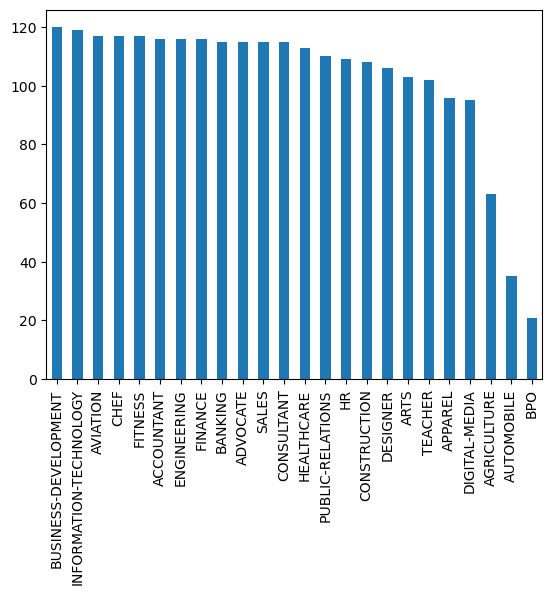

In [55]:
df['Category'].value_counts().plot(kind='bar')


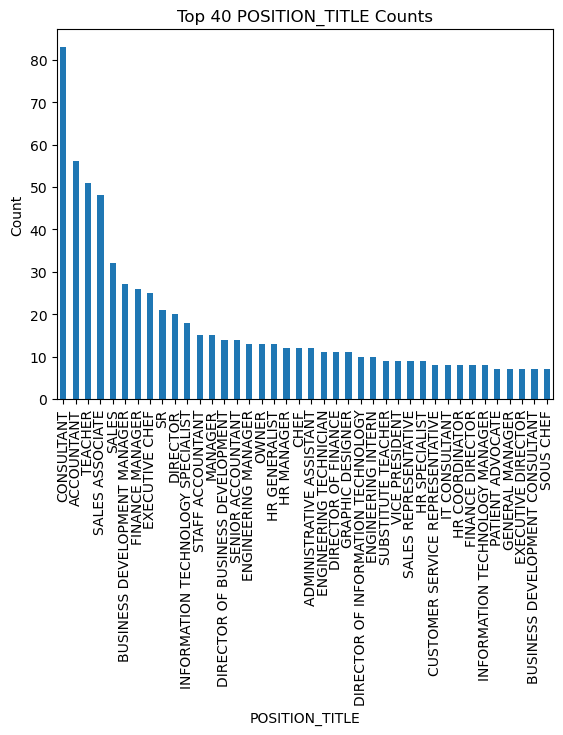

In [56]:
# Count the number of applicants for each position
value_counts = df_resume['POSITION_TITLE'].value_counts()

# Select the top 40 positions by count
value_counts.head(40).plot(kind='bar')

# Set the plot title and axes labels
plt.title('Top 40 POSITION_TITLE Counts')
plt.xlabel('POSITION_TITLE')
plt.ylabel('Count')

# Display the plot
plt.show()



### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [57]:

# Group the data by EDUCATION_MAJOR and then calculates the mean of the EXPERIENCE_LENGTH column for each group
avg_experience = df_resume.groupby('EDUCATION_MAJOR')['EXPERIENCE_LENGTH'].mean()

# Calculates the average skills count (SKILLS_COUNT) for each unique value of EDUCATION_MAJOR
avg_skills_count = df_resume.groupby('EDUCATION_MAJOR')['SKILLS_COUNT'].mean()

# Calculate the count of awards for each education major
award_count = df_resume.groupby('EDUCATION_MAJOR')['AWARDS'].apply(lambda x: x.str.count('yes').sum())

# Calculate a combined score for each education major based on experience length, skills count, and awards
score = avg_experience + avg_skills_count + award_count

# Find the education major with the highest (max) score
print(score[score == score.max()].index[0])



science


Education Major with a good future is science degree

### <span style="color:brown">Q3:

what is the most common skills among all applications?

In [60]:
df_resume['SKILLS'] = df_resume['SKILLS'].apply(ast.literal_eval)

In [63]:

# Concatenate all the lists into a single list
all_elements = list(itertools.chain.from_iterable(df_resume['SKILLS']))

# Count the occurrences of each element
element_counts = pd.Series(all_elements).value_counts()

# the three most common elements
print("The most common 3 skills:", element_counts.head(3).index.tolist())

print("The count of the 3 most common skills:")
for element, count in element_counts.head(3).items():
    print(f"{element}: {count}")


The most common 3 skills: ['Excel', 'clients', 'sales']
The count of the 3 most common skills:
Excel: 409
clients: 332
sales: 306


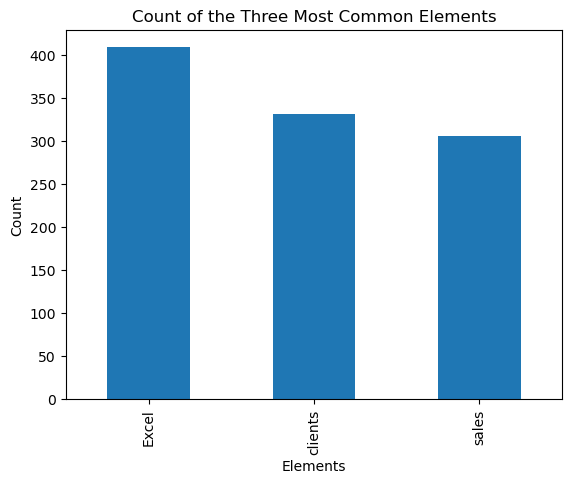

In [65]:
# Plot the counts
element_counts.head(3).plot(kind='bar')
plt.xlabel('Elements')
plt.ylabel('Count')
plt.title('Count of the Three Most Common Elements')
plt.show()



##### The most common skill among all applications is: Excel

### <span style="color:brown">Q4:

Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

In [66]:
# Calculate the number of applicants engaged in community service for each position
community_service_counts = df_resume[df_resume['COMMUNITY_SERVICE'] == 'yes'].groupby('POSITION_TITLE').size().reset_index(name='COMMUNITY_SERVICE_COUNT')

# Calculate the number of applicants engaged in volunteering for each position
volunteering_counts = df_resume[df_resume['VOLUNTEERING'] == 'yes'].groupby('POSITION_TITLE').size().reset_index(name='VOLUNTEERING_COUNT')

# Merge the two counts
activity_counts = community_service_counts.merge(volunteering_counts, on='POSITION_TITLE', how='outer')

# Fill missing values with 0
activity_counts.fillna(0, inplace=True)

# Calculate the total activity score for each position
activity_counts['ACTIVITY_SCORE'] = activity_counts['COMMUNITY_SERVICE_COUNT'] + activity_counts['VOLUNTEERING_COUNT']

# Sort the positions based on activity score in descending order
activity_counts = activity_counts.sort_values('ACTIVITY_SCORE', ascending=False)

# position with the highest activity score
activity_counts.iloc[0]['POSITION_TITLE']


'CONSULTANT'

#### The most active and community-helpful applicants are for the position of Consultant.

### <span style="color:brown">Q5:

could you nominate the best job application for each position?

In [67]:
def nominate_best_job_application(df_resume, position):
    # Filter the DataFrame to include only rows with the desired position
    filtered_df = df_resume[df_resume['POSITION_TITLE'] == position]

    # Filter applications based on EXPERIENCE_LENGTH and SKILLS_COUNT
    filtered_df = filtered_df[(filtered_df['EXPERIENCE_LENGTH'] > 0) & (filtered_df['SKILLS_COUNT'] > 0)]

    # Check if there are any applications remaining after the first filter
    if len(filtered_df) == 0:
        print(f"No job applications found for position '{position}'.")
        return None

    # Filter applications based on AWARDS, COMMUNITY_SERVICE, and VOLUNTEERING
    award_filtered_df = filtered_df[(filtered_df['AWARDS'] == 'yes') &
                                    ((filtered_df['COMMUNITY_SERVICE'] == 'yes') | (filtered_df['VOLUNTEERING'] == 'yes'))]

    # If the award and community service/volunteering condition is false, filter based on EXPERIENCE_LENGTH and SKILLS_COUNT only
    if len(award_filtered_df) == 0:
        award_filtered_df = filtered_df

    # Find the application with the maximum SKILLS_COUNT
    best_application = award_filtered_df[award_filtered_df['SKILLS_COUNT'] == award_filtered_df['SKILLS_COUNT'].max()]

    # If there are multiple applications with the same SKILLS_COUNT, find the one with the maximum EXPERIENCE_LENGTH
    if len(best_application) > 1:
        best_application = best_application[best_application['EXPERIENCE_LENGTH'] ==  best_application['EXPERIENCE_LENGTH'].max()]

    # Return the ID of the best job application for the position
    return best_application.index[0] if len(best_application) > 0 else None

# Get a list of positions that have more than 10 counts
positions = df_resume['POSITION_TITLE'].value_counts().loc[lambda x: x > 10].index.tolist()

for position in positions:
    best_application_id = nominate_best_job_application(df_resume, position)
    if best_application_id is not None:
        print(f"Best application ID for position '{position}': {best_application_id}")


Best application ID for position 'CONSULTANT': 1129
Best application ID for position 'ACCOUNTANT': 1824
Best application ID for position 'TEACHER': 348
Best application ID for position 'SALES ASSOCIATE': 1059
Best application ID for position 'SALES': 1011
Best application ID for position 'BUSINESS DEVELOPMENT MANAGER': 609
Best application ID for position 'FINANCE MANAGER': 1482
Best application ID for position 'EXECUTIVE CHEF': 1381
Best application ID for position 'SR': 1967
Best application ID for position 'DIRECTOR': 233
Best application ID for position 'INFORMATION TECHNOLOGY SPECIALIST': 234
Best application ID for position 'STAFF ACCOUNTANT': 1928
Best application ID for position 'MANAGER': 523
Best application ID for position 'DIRECTOR OF BUSINESS DEVELOPMENT': 671
Best application ID for position 'SENIOR ACCOUNTANT': 1901
Best application ID for position 'ENGINEERING MANAGER': 1719
Best application ID for position 'OWNER': 1449
Best application ID for position 'HR GENERALIST':

### <span style="color:brown">Q6:

Do you think learning another language could effect the application, support your opinion.

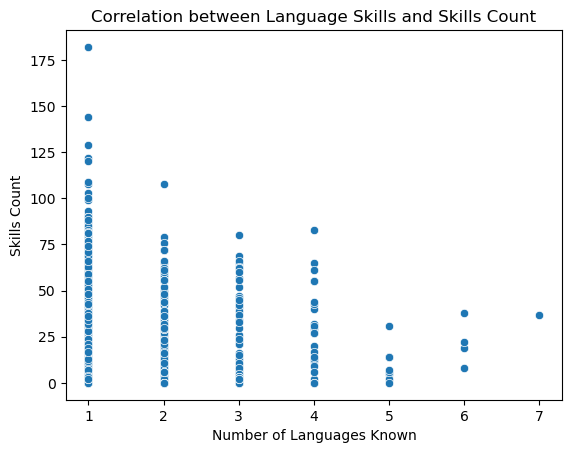

Correlation coefficient: -0.0025331607831905177


In [64]:

# Calculate the correlation between language skills and chances of selection
correlation = df_resume['LANGUAGES'].corr(df_resume['SKILLS_COUNT'])

# Visualize the correlation using a scatter plot
sns.scatterplot(data=df_resume, x='LANGUAGES', y='SKILLS_COUNT')
plt.title('Correlation between Language Skills and Skills Count')
plt.xlabel('Number of Languages Known')
plt.ylabel('Skills Count')

# Display the plot
plt.show()

# Print the correlation coefficient
print('Correlation coefficient:', correlation)



#### Based on the correlation coefficient of -0.0025, we can conclude that there is a very weak negative correlation between the number of languages known and the skills count.

In [65]:
df_resume.groupby('LANGUAGES')['EXPERIENCE_LENGTH'].mean()

LANGUAGES
1    13.392546
2    10.743590
3     9.763158
4    10.260870
5    11.625000
6     6.250000
7    13.000000
Name: EXPERIENCE_LENGTH, dtype: float64

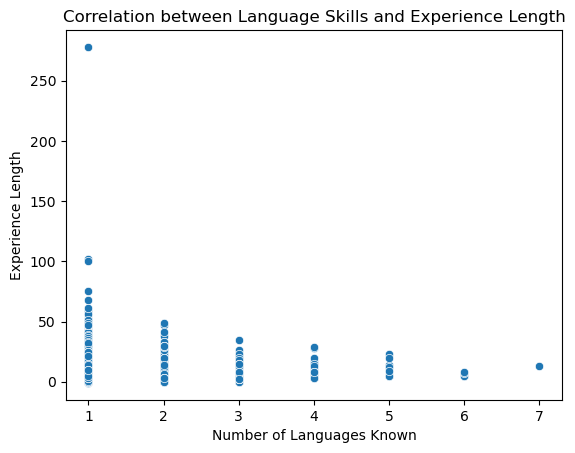

Correlation coefficient: -0.07915192450846335


In [66]:

# Calculate the correlation between language skills and experience length
correlation = df_resume['LANGUAGES'].corr(df_resume['EXPERIENCE_LENGTH'])

# Visualize the correlation using a scatter plot
sns.scatterplot(data=df_resume, x='LANGUAGES', y='EXPERIENCE_LENGTH')
plt.title('Correlation between Language Skills and Experience Length')
plt.xlabel('Number of Languages Known')
plt.ylabel('Experience Length')

# Display the plot
plt.show()

# Print the correlation coefficient
print('Correlation coefficient:', correlation)


#### correlation coefficient = -0.0791, we can conclude that there is a weak negative correlation between the number of languages known and the experience length.

#### Based on the weak correlation coefficients we obtained previously (-0.0025331607831905177 and -0.07915192450846335), it does not appear that learning another language has a significant impact on the application process or the chances of being selected.

## <span style="color:brown">Q7:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

2023-07-11 13:33:47,955 [1244] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

2023-07-11 13:33:48,010 [1244] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

2023-07-11 13:33:48,070 [1244] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg:

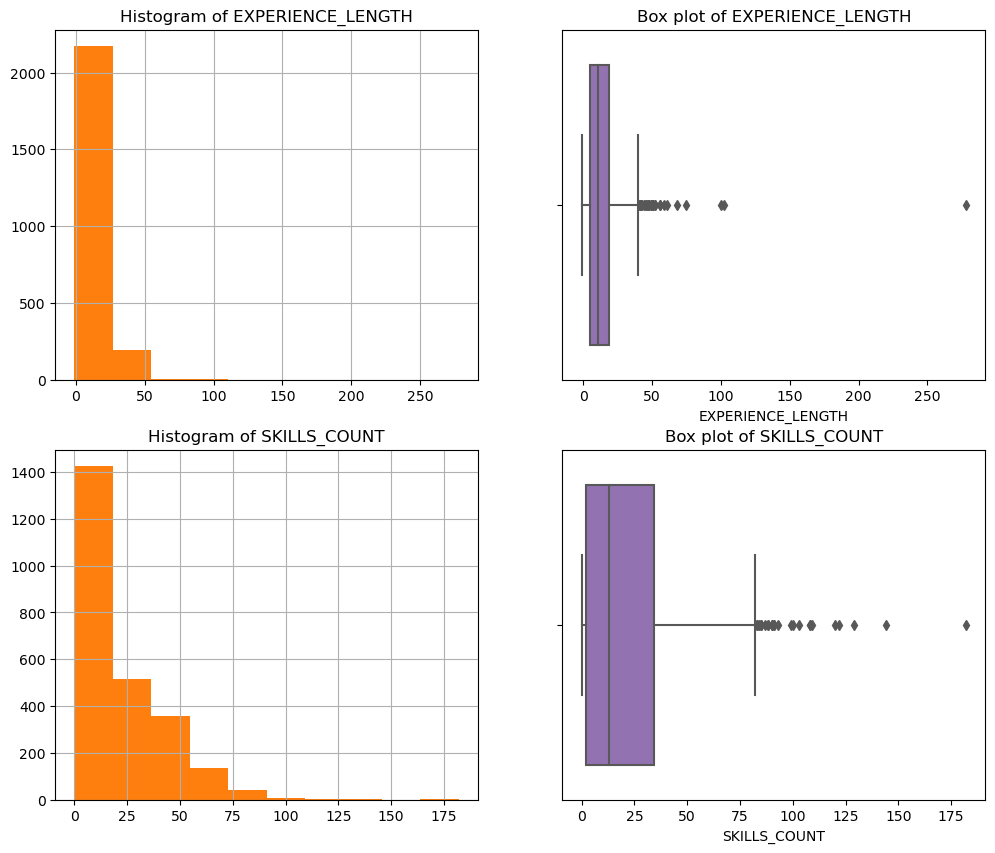

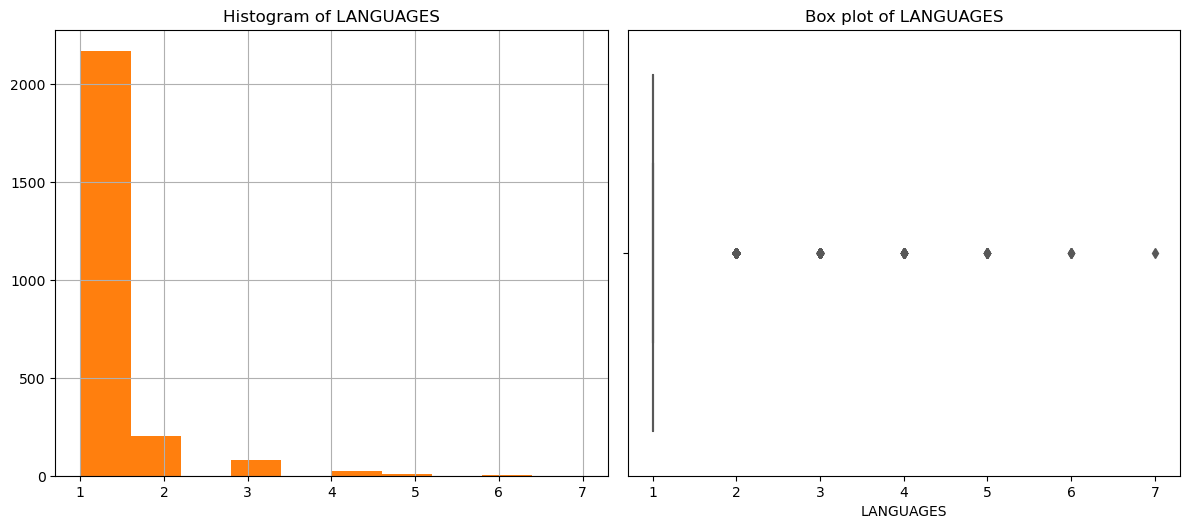

In [67]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Distribution of EXPERIENCE_LENGTH
plt.subplot(2, 2, 1)
df_resume.EXPERIENCE_LENGTH.hist(color='#ff7f0e')
plt.title('Histogram of EXPERIENCE_LENGTH')

plt.subplot(2, 2, 2)
sns.boxplot(df_resume.EXPERIENCE_LENGTH, color='#9467bd')
plt.title('Box plot of EXPERIENCE_LENGTH')


# Distribution of SKILLS_COUNT
plt.subplot(2, 2, 3)
df_resume.SKILLS_COUNT.hist(color='#ff7f0e')
plt.title('Histogram of SKILLS_COUNT')

plt.subplot(2, 2, 4)
sns.boxplot(df_resume.SKILLS_COUNT, color='#9467bd')
plt.title('Box plot of SKILLS_COUNT')

# Distribution of LANGUAGES
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_resume.LANGUAGES.hist(color='#ff7f0e')
plt.title('Histogram of LANGUAGES')

plt.subplot(2, 2, 2)
sns.boxplot(df_resume.LANGUAGES,color='#9467bd')
plt.title('Box plot of LANGUAGES')

plt.tight_layout()  
plt.show()


2023-07-11 13:33:49,137 [1244] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



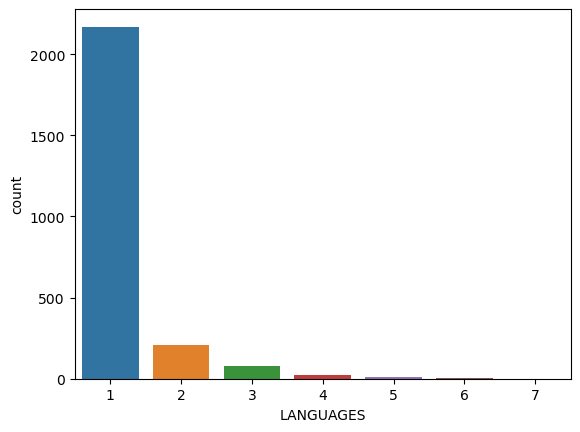

In [68]:
# Countplot
sns.countplot('LANGUAGES', data=df_resume)
plt.show()

In [69]:
df_resume.describe()

,EXPERIENCE_LENGTH,SKILLS_COUNT,LANGUAGES
count,2373.000000,2492.000000,2492.000000
mean,13.010114,20.194623,1.200241
std,11.440361,21.400978,0.608081
min,-1.000000,0.000000,1.000000
25%,5.000000,2.000000,1.000000
50%,11.000000,13.000000,1.000000
75%,19.000000,34.000000,1.000000
max,278.000000,182.000000,7.000000


 ## Observations:

#### EXPERIENCE_LENGTH:
- The minimum value is -1, which seems like an outlier or a missing value, as experience length cannot be negative.
- The mean (average) experience length is approximately 13.01 units.
- The standard deviation is around 11.44, indicating a relatively high variability in experience lengths.
- The data ranges from -1 to 278, with most values falling between 5 and 19.
- The 25th percentile (Q1) is 5, meaning that 25% of the values are less than or equal to 5.
- The median (50th percentile or Q2) is 11, indicating that half of the values are less than or equal to 11.
- The 75th percentile (Q3) is 19, meaning that 75% of the values are less than or equal to 19.
- The maximum value is 278, which appears to be an outlier.

#### SKILLS_COUNT:

- The minimum value is 0, indicating that some individuals have no recorded skills.
- The mean number of skills is approximately 20.19.
- The standard deviation is around 21.40, suggesting a wide range of skill counts.
- The data ranges from 0 to 182, with most values falling between 2 and 34.
- The 25th percentile (Q1) is 2, indicating that 25% of the values are below 2.
- The median (50th percentile or Q2) is 13, indicating that half of the values are below 13.
- The 75th percentile value(Q3) is 34, indicating that 75% of the values are below 34.
- The maximum skill count is 182.


#### LANGUAGES:

- The data ranges from 1(minimum) to 7(maximum), with most individuals knowing only one language.
- The mean number of languages is approximately 1.20, indicating that individuals typically know one language.
- The standard deviation is around 0.61, suggesting a relatively low variability in language counts.
- All values are integers, with no missing values.

## <span style="color:brown">Q8:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [14]:
df_resume.describe(include=['O'])

,POSITION_TITLE,QUALIFICATIONS,EDUCATION_TYPE,SCHOOL_TYPE,EDUCATION_MAJOR,AWARDS,COMMUNITY_SERVICE,VOLUNTEERING,DRIVERS_LICENSE_AVAILABILITY,SKILLS
count,2484,2038,2469,2328,1803,2492,2492,2492,2492,2492
unique,1414,1997,4,3,308,2,2,2,2,2004
top,CONSULTANT,High-energy Manager successful in building and...,Bachelor,university,science,no,no,no,no,[]
freq,83,4,1662,1733,674,1610,2360,2125,2462,482


 ## Observations:


#### 1. POSITION_TITLE:
   - There are 2484 non-null values in this column.
   - There are 1414 unique position titles.
   - The most frequent position title is "CONSULTANT" with a frequency of 83.

#### 2. QUALIFICATIONS:
   - There are 2038 non-null values in this column.
   - There are 1997 unique sets of qualifications.
   - The most frequent set of qualifications appears 4 times.

#### 3. EDUCATION_TYPE:
   - There are 2469 non-null values in this column.
   - There are 4 unique education types.
   - The most frequent education type is "Bachelor" with a count of 1662.

#### 4. SCHOOL_TYPE:
   - There are 2328 non-null values in this column.
   - There are 3 unique school types.
   - The most frequent school type is "university" with a count of 1733.

#### 5. EDUCATION_MAJOR:
   - There are 1803 non-null values in this column.
   - There are 308 unique education majors.
   - The most frequent education major is "science" with a count of 674.

#### 6. AWARDS:
   - There are 2492 non-null values in this column.
   - There are 2 (yes,no)unique values in this column, indicating the presence or absence of awards.
   - The absence of awards (value: "no") is the most frequent with a count of 1610.

#### 7. COMMUNITY_SERVICE:
   - There are 2492 non-null values in this column.
   - There are 2(yes,no) unique values in this column, indicating the presence or absence of community service.
   - The absence of community service (value: "no") is the most frequent with a count of 2360.

#### 8. VOLUNTEERING:
   - There are 2492 non-null values in this column.
   - There are 2 (yes,no) unique values in this column, indicating the presence or absence of volunteering.
   - The absence of volunteering (value: "no") is the most frequent with a count of 2125.

#### 9. DRIVERS_LICENSE_AVAILABILITY:
   - There are 2492 non-null values in this column.
   - There are 2(yes,no) unique values in this column, indicating the availability or unavailability of a driver's license.
   - The absence of a driver's license (value: "no") is the most frequent with a count of 2462.

#### 10. SKILLS:
    - There are 2492 non-null values in this column.
    - There are 2004 unique sets of skills.
    - The most frequent set of skills appears 482 times.
    - The empty list "[]" is the most frequent set of skills.


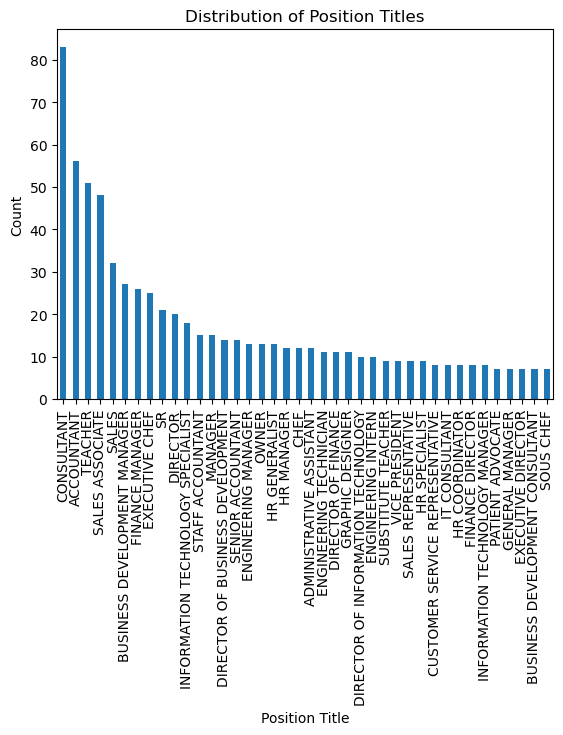

In [23]:
df_resume['POSITION_TITLE'].value_counts().head(40).plot(kind='bar')
plt.xlabel('Position Title')
plt.ylabel('Count')
plt.title('Distribution of Position Titles')
plt.show()


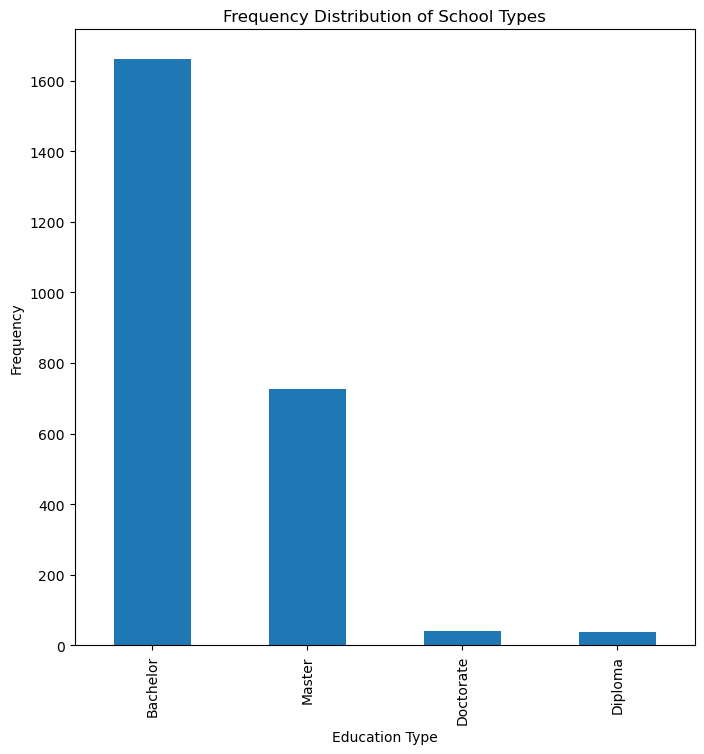

In [22]:
plt.figure(figsize=(8, 8))
df_resume['EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.ylabel('')
plt.xlabel('Education Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of School Types')
plt.show()

In [36]:
 df_resume.groupby('EDUCATION_TYPE').size().reset_index(name='Count')

# The "EDUCATION_TYPE" column contains 4 categories: "Bachelor", "Master","Doctorate", and "Diploma"
# The most common education type among the entries is "Bachelor" with a count of 1662
# The least common education type is "Diploma," with a count of 38

,EDUCATION_TYPE,Count
0,Bachelor,1662
1,Diploma,38
2,Doctorate,42
3,Master,727


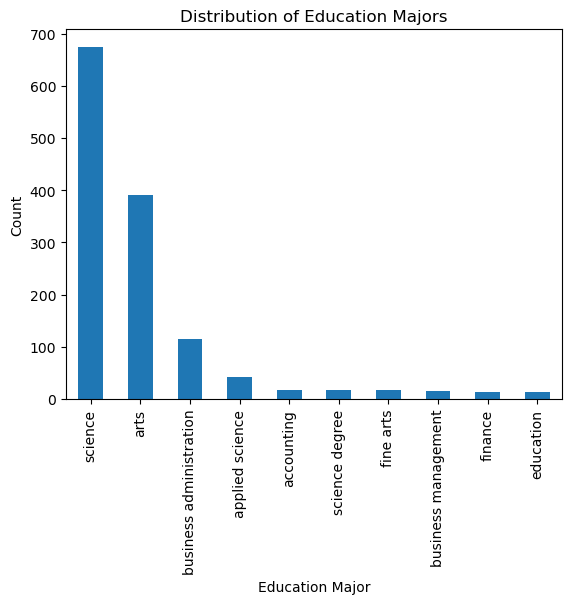

In [19]:
df_resume['EDUCATION_MAJOR'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Education Major')
plt.ylabel('Count')
plt.title('Distribution of Education Majors')
plt.show()


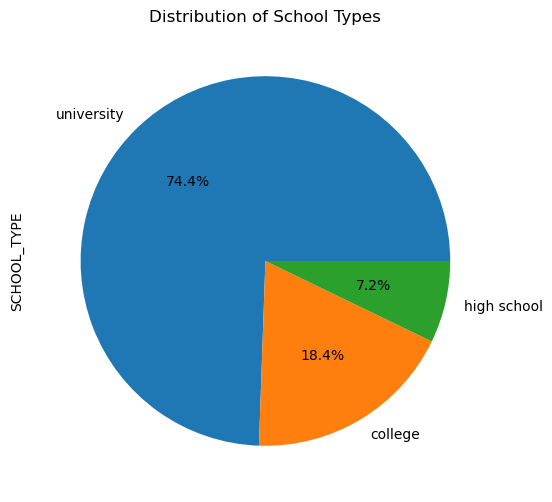

In [20]:

plt.figure(figsize=(10, 6))
df_resume['SCHOOL_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of School Types')
plt.show()

In [74]:
 df_resume.groupby('SCHOOL_TYPE').size().reset_index(name='Count')
    
# The "SCHOOL_TYPE" column contains three categories: "college", "high school", and "university." 
# The majority of the entries university (1733)

,SCHOOL_TYPE,Count
0,college,428
1,high school,167
2,university,1733


2023-07-11 17:22:03,065 [11760] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



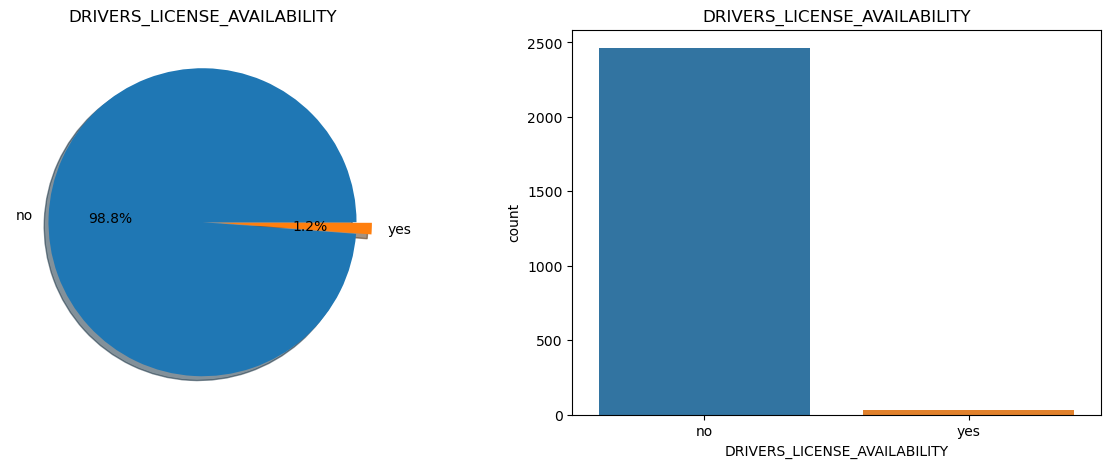

In [7]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df_resume['DRIVERS_LICENSE_AVAILABILITY'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DRIVERS_LICENSE_AVAILABILITY')
ax[0].set_ylabel('')
sns.countplot('DRIVERS_LICENSE_AVAILABILITY',data=df_resume,ax=ax[1])
ax[1].set_title('DRIVERS_LICENSE_AVAILABILITY')
plt.show()


#### A very small proportion indicated that they have a driver's licence(1.2%).Unbalanced dataset.

2023-07-11 17:37:10,300 [11760] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



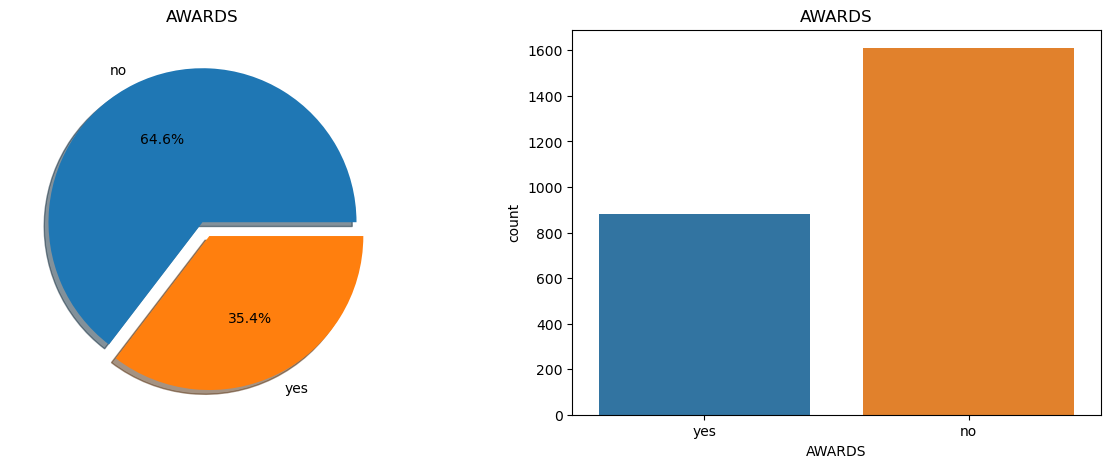

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df_resume['AWARDS'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('AWARDS')
ax[0].set_ylabel('')
sns.countplot('AWARDS',data=df_resume,ax=ax[1])
ax[1].set_title('AWARDS')
plt.show()


2023-07-11 17:36:11,121 [11760] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



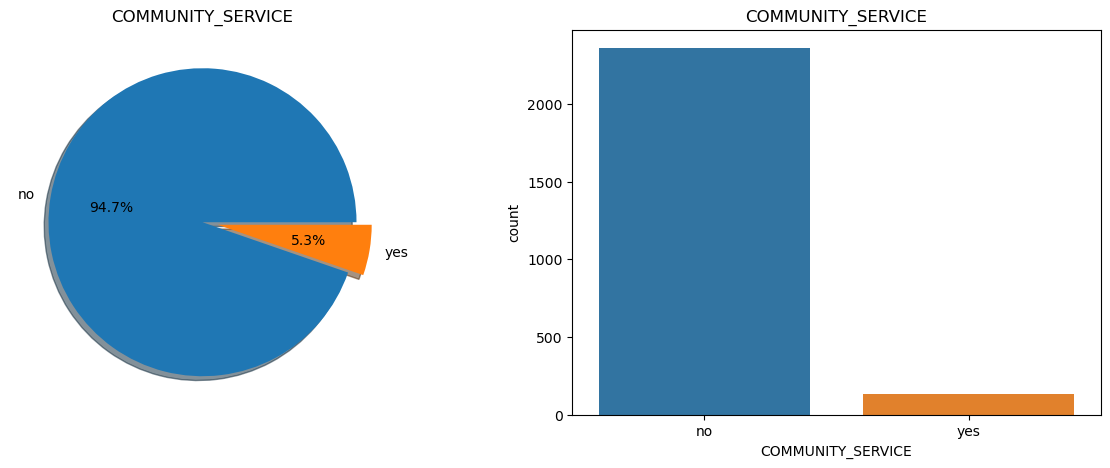

In [8]:

f,ax=plt.subplots(1,2,figsize=(15,5))
df_resume['COMMUNITY_SERVICE'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('COMMUNITY_SERVICE')
ax[0].set_ylabel('')
sns.countplot('COMMUNITY_SERVICE',data=df_resume,ax=ax[1])
ax[1].set_title('COMMUNITY_SERVICE')
plt.show()


2023-07-11 17:40:08,727 [11760] WARNING  py.warnings:109: [JupyterRequire] C:\Users\leen0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



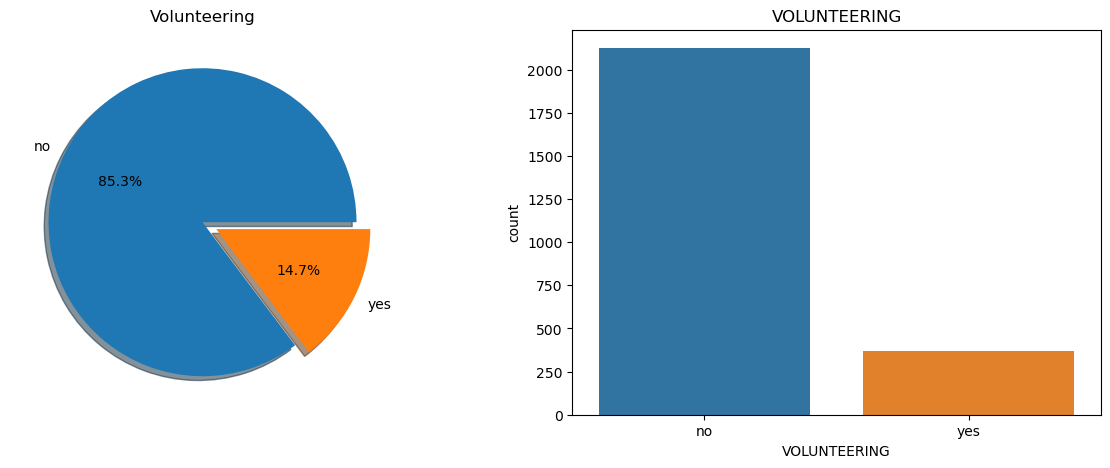

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df_resume['VOLUNTEERING'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Volunteering')
ax[0].set_ylabel('')
sns.countplot('VOLUNTEERING',data=df_resume,ax=ax[1])
ax[1].set_title('VOLUNTEERING')
plt.show()


### It is clear that few people have volunteered or served in the community. Unbalanced dataset

## Great Job.